<center> <font size="+1"> TP2 SIC 4102 </font> </center>

# Problème de moindre norme (système sur-déterminé)


$
\newcommand{\bA}{\mathbf{A}}
\newcommand{\bx}{\mathbf{x}}
\newcommand{\by}{\mathbf{y}}
\newcommand{\be}{\mathbf{e}}
\newcommand{\br}{\mathbf{r}}
\newcommand{\RR}{\mathbb{R}}
\newcommand{\Argmin}{\mathrm{Argmin}}
\newcommand{\st}{\mathrm{s.t.}}
$

On considère le modèle d'observation suivant:
$$
\by = \bA\bx_0 + \be
$$
où $\bA\in\RR^{m\times n}$ est une matrice donnée, $\by$ est le vecteur d'observation, $\bx_0$ est le vecteur des vraies données à reconstituer et $\be$ est un terme de bruit perturbateur.

On suppose $m\geq n$, c'est-à-dire plus d'observations que d'inconnues et on s'intéresse au problème:
$$
\Argmin_\bx \Phi(\br) = \sum_{i=1}^m \phi(r_i) \quad \st \quad \br=\by-\bA\bx
$$
pour différentes fonctions $\phi$ données ci-dessous:
- $\phi(.) = (.)^2$ : on a alors le problème de moindre norme $\ell_2$,
- $\phi(.) = |.|$ : on a alors le problème de moindre norme $\ell_1$,
- $\phi(.) = $ est la fonction "dead-zone linear" ou "$\alpha$-insensitive loss.

In [32]:
# Import de libraires
# %matplotlib inline
import sys
import scipy
import matplotlib.pyplot as plt
import numpy as np
sys.path.append('../')
import tp2a

### Approximation, problème de moindre norme

Reprogrammer la fonction `tp2a.educ.approx_l2(A, y)` qui donne $\hat{\bx}_{\ell_2}= \Argmin_{\bx}  \|\by-\bA\bx\|_2^2$.

In [6]:
def inv_sol(A, b):
    return np.linalg.inv(A).dot(b)
    #raise UserWarning('Reprogrammer cette fonction')


def approx_l2(A, b):
    B=np.dot(np.transpose(A),A)
    Ay=np.transpose(A).dot(b)
    return np.linalg.inv(B).dot(Ay)
    


def least_l2_pen(A, b):
    return A.transpose().dot(np.linalg.inv(A.dot(A.transpose()))).dot(b)
    #raise UserWarning('Reprogrammer cette fonction')


def ridge(A, b, lamb):
    B=np.dot(np.transpose(A),A)+lamb*np.eye(A.shape[0])
    Ay=np.transpose(A).dot(b)
    return np.linalg.inv(B).dot(Ay)
    #raise UserWarning('Reprogrammer cette fonction')

Reprogrammer une fonction `tp2a.lpalgs.approx_l1(A, y)` qui donne $\hat{\bx}_{\ell_1} = \Argmin_{\bx}\|\by-\bA\bx\|_1$ et une fonction `approx_dzl(A, y)` qui renvoit $\hat{\bx}_{\mathrm{dzl}} = \Argmin_{\bx} \mathrm{dzl}(\by-\bA\bx)$ où $\mathrm{dzl}(u) = \max(0,|u|-\alpha)$ 

<u>Indication</u>: ces problèmes se transforment en LP et le solveur scipy.optimize.linprog pourra être utilisé avec la méthode "interior-point").

In [63]:
def approx_l1(A, b):
    m, n = A.shape
    c=[]
    tetec=[]
    queuec=[]
    for i in range(0,m):
        tetec+=[1]
    for i in range(0,n):
        queuec+=[0]
    c=tetec+queuec
    bub=np.concatenate((b, -b))
    Aub=np.zeros((2*m,n+m))
    for i in range(0,m):
        Aub[i][i]=-1
        Aub[m+i][i]=-1
        for j in range(0,n):
            Aub[i][m+j]=A[i][j]
            Aub[i+m][m+j]=-A[i][j]
    mtest, ntest = Aub.shape
    print(mtest,ntest,2*n)
    
    lpSol = scipy.optimize.linprog(c, Aub, bub, method='interior-point')
    x = lpSol.x[m:]
    return x


def approx_dzl(A, b, alpha):
    m, n = A.shape
    c=[]
    tetec=[]
    queuec=[]
    for i in range(0,m):
        tetec+=[1]
    for i in range(0,n):
        queuec+=[0]
    c=tetec+queuec
    bub=np.concatenate((b, -b))
    for i in range(0,len(bub)):
        bub[i]+=alpha
    Aub=np.zeros((2*m,n+m))
    for i in range(0,m):
        Aub[i][i]=-1
        Aub[m+i][i]=-1
        for j in range(0,n):
            Aub[i][m+j]=A[i][j]
            Aub[i+m][m+j]=-A[i][j]
    mtest, ntest = Aub.shape
    print(mtest,ntest,2*n)
    
    lpSol = scipy.optimize.linprog(c, Aub, bub, method='interior-point')
    x = lpSol.x[m:]
    return x


Tirer $\bA$ de taille $m\times n$ et $\by$ de taille $m$ aléatoirement (loi gaussienne, éléments indépendants).
Tracer l'histograme des résidus $\by-\bA\hat{\bx}_{\ell_2}$, $\by-\bA\hat{\bx}_{\ell_1}$ et $\by-\bA\hat{\bx}_{\mathrm{dzl}}$. Commenter les résultats.

400 300 200
400 300 200


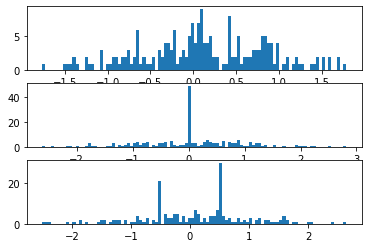

In [64]:
m, n = 200, 100
A = np.random.randn(m,n)
y = np.random.randn(m)

xl2 = approx_l2(A, y)
xl1 = approx_l1(A, y)
xdzl = approx_dzl(A, y, 0.5)

Fig, Ax = plt.subplots(3,1)
_ = Ax[0].hist(y-A.dot(xl2),bins=100)
_ = Ax[1].hist(y-A.dot(xl1),bins=100)
_ = Ax[2].hist(y-A.dot(xdzl),bins=100)